<!-- Importing modules -->

<!-- Importing Modules -->

In [375]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [376]:
dataset = pd.read_csv("winequality-red.csv")

<!-- Data pre-processing -->

In [377]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [378]:
dataset.shape

(1599, 12)

In [379]:
dataset.index

RangeIndex(start=0, stop=1599, step=1)

In [380]:
dataset.columns
# dataset.columns.tolist()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [381]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [382]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [383]:
np.where(pd.isnull(dataset))

(array([], dtype=int64), array([], dtype=int64))

In [384]:
# dataset.isnull()
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [385]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [386]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [387]:
dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [388]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [389]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<!-- Visualization -->

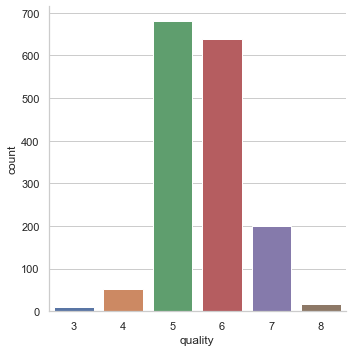

In [390]:
sn.catplot(data=dataset, x='quality', kind='count');

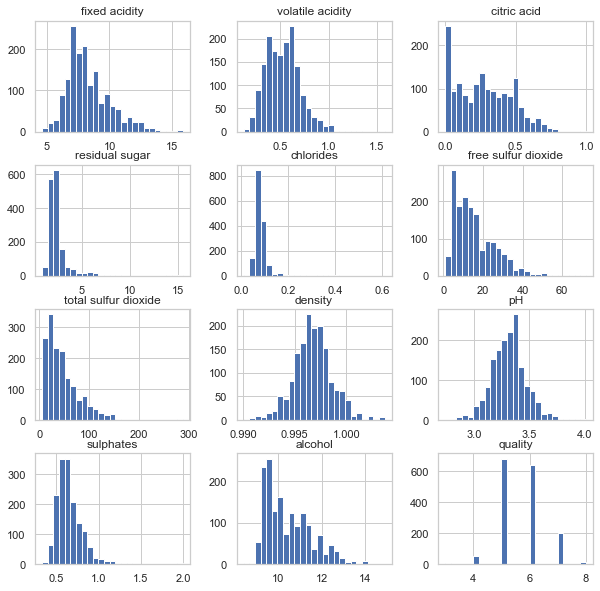

In [391]:
dataset.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

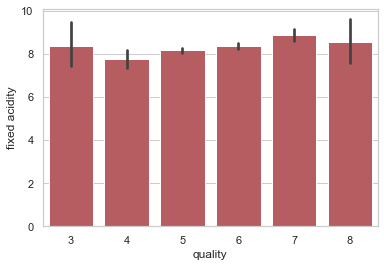

In [392]:
sn.set_theme(style="whitegrid")
sn.barplot(x='quality', y='fixed acidity', data=dataset , color="r") 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

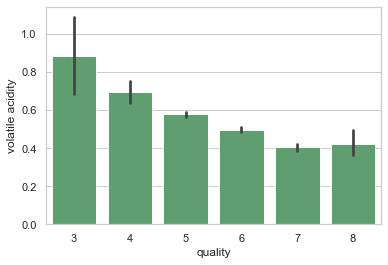

In [393]:
sn.set_theme(style="whitegrid")
sn.barplot(x='quality', y='volatile acidity', data=dataset , color="g") 

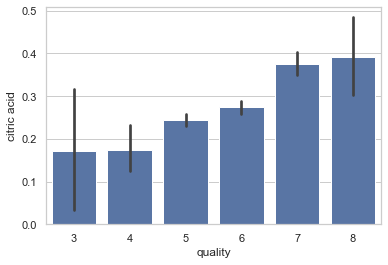

In [125]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='citric acid', data=dataset , color="b") 

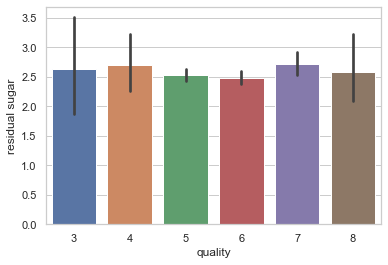

In [128]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='residual sugar', data=dataset) 

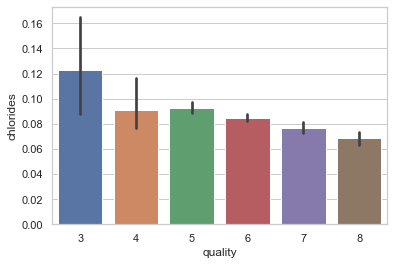

In [129]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='chlorides', data=dataset) 

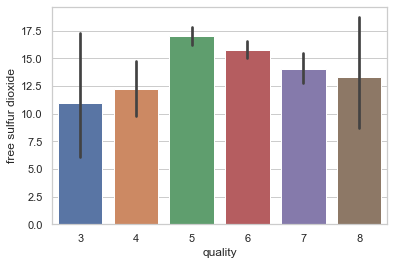

In [130]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='free sulfur dioxide', data=dataset) 

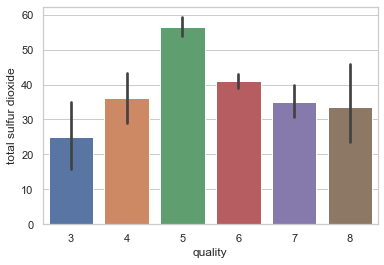

In [132]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='total sulfur dioxide', data=dataset) 

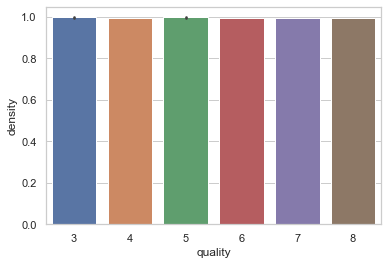

In [133]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='density', data=dataset) 

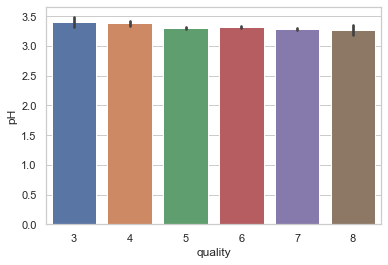

In [134]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='pH', data=dataset) 

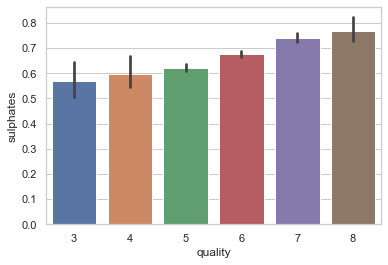

In [135]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='sulphates', data=dataset) 

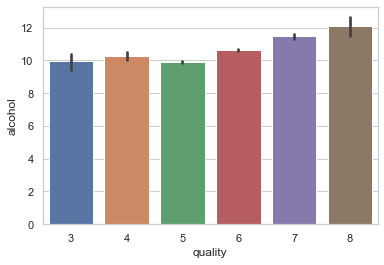

In [136]:
sn.set_theme(style="whitegrid")
ax= sn.barplot(x='quality', y='alcohol', data=dataset) 

<AxesSubplot:>

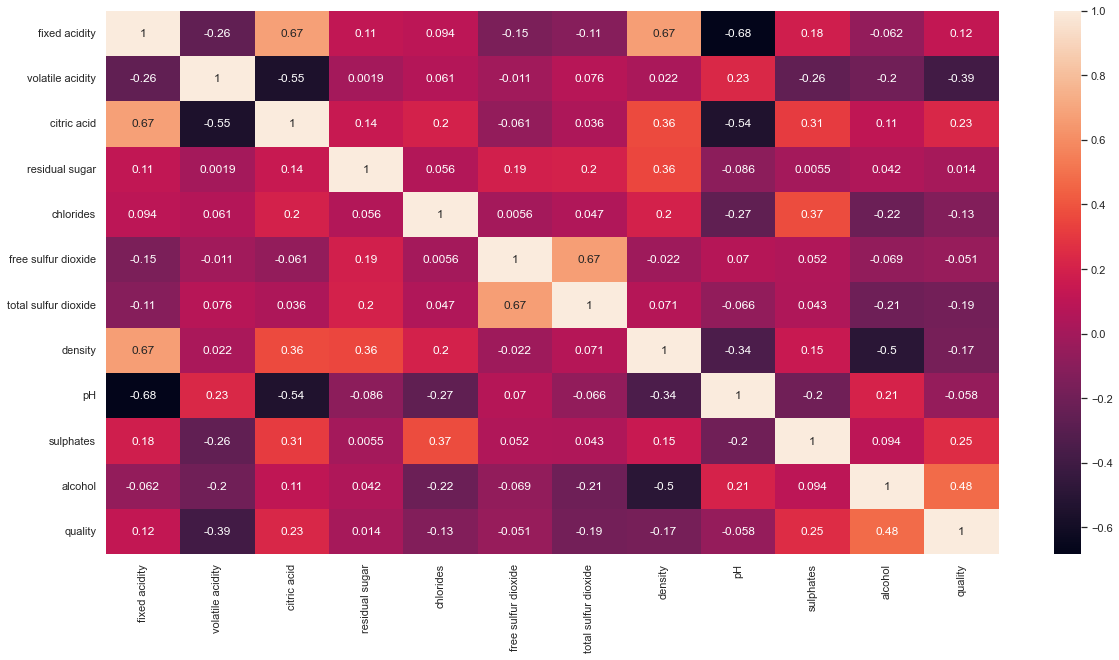

In [148]:
# ploting heatmap
plt.figure(figsize=[20,10],facecolor='white')
sn.heatmap(dataset.corr(),annot=True)

In [394]:
# Create Classification version of target variable
# we assume wine quality >= 7 is good quality wine otherwise bad quality wine

dataset['goodquality'] = [1 if x >= 7 else 0 for x in dataset['quality']]

In [395]:
x = dataset.drop(['quality','goodquality'], axis=1)
y = dataset['goodquality']

In [396]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [397]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [398]:
dataset['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [399]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
x_features = x
x = StandardScaler().fit_transform(x)

In [400]:
x_train , x_test, y_train , y_test = train_test_split(x,y,random_state=10 , train_size = 0.8)  

In [401]:
print(x.shape , x_train.shape , x_test.shape)  

(1599, 11) (1279, 11) (320, 11)


In [193]:
print(y.shape , y_train.shape , y_test.shape)  

(1599,) (1279,) (320,)


<!-- Logistic regression -->

In [402]:
model1 = LogisticRegression()
model1.fit(x_train , y_train)
y_predict1 = model1.predict(x_test)
print(y_predict1)
accuracy1 = accuracy_score(y_test, y_predict1)
print('\n Accuracy score for logistic regression on test data is : '  , accuracy1)
print('\n' ,  classification_report(y_test, y_predict1))

MAE1 = metrics.mean_absolute_error(y_predict1, y_test)
MSE1 = metrics.mean_squared_error(y_predict1, y_test)
                                
print('Mean Absolute Error :', MAE1)
print('Mean Squared Error  :', MSE1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0]

 Accuracy score for logistic regression on test data is :  0.86875

               precision    recall  f1-score   support

           0       0.89      0.97      0.93       270
           1       0.67      0.32      0.43        50

    accuracy                           0.87       320
   macro avg       0.78      0.65      0.68       320
weighted

<!--   DecisionTreeClassifier -->

In [403]:
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(x_train , y_train)
y_predict2 = model2.predict(x_test)
print(y_predict2)
accuracy2 = accuracy_score(y_test, y_predict2)
print('\n Accuracy score for Decision tree regression on test data is : '  , accuracy2)
print('\n' ,  classification_report(y_test, y_predict2))

MAE2 = metrics.mean_absolute_error(y_predict2, y_test)
MSE2 = metrics.mean_squared_error(y_predict2, y_test)
                                
print('Mean Absolute Error :', MAE2)
print('Mean Squared Error  :', MSE2)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0]

 Accuracy score for Decision tree regression on test data is :  0.859375

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       270
           1       0.55      0.54      0.55        50

    accuracy                           0.86       320
   macro avg       0.73      0.73      0.73       320
we

<!--  RandomForestClassifier -->

In [365]:
model3 = RandomForestClassifier(random_state=1)
model3.fit(x_train , y_train)
y_predict3 = model3.predict(x_test)
print(y_predict3)
accuracy3 = accuracy_score(y_test, y_predict3)
print('\n Accuracy score for Random Forest  regression on test data  is : '  , accuracy3)
print('\n' ,  classification_report(y_test, y_predict3))

MAE3 = metrics.mean_absolute_error(y_predict3, y_test)
MSE3 = metrics.mean_squared_error(y_predict3, y_test)
                                
print('Mean Absolute Error :', MAE3)
print('Mean Squared Error  :', MSE3)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]

 Accuracy score for Random Forest  regression on test data  is :  0.9

               precision    recall  f1-score   support

           0       0.91      0.98      0.94       270
           1       0.82      0.46      0.59        50

    accuracy                           0.90       320
   macro avg       0.86      0.72      0.77       320
weigh

In [404]:
data = {'MAE':[MAE1 , MAE2 , MAE3], 'MSE':[MSE1 , MSE2 , MSE3] , 'AccuracyScore': [accuracy1,accuracy2,accuracy3]}  

compare_models = pd.DataFrame(data, index =['Logisticreg','DecisionTree','RandomForest'])  
compare_models

,MAE,MSE,AccuracyScore
Logisticreg,0.131250,0.131250,0.868750
DecisionTree,0.140625,0.140625,0.859375
RandomForest,0.100000,0.100000,0.900000


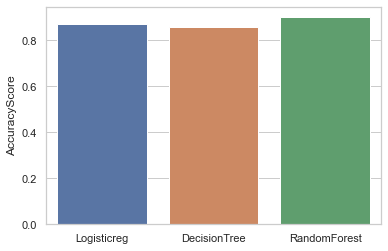

In [405]:
sn.barplot(data= compare_models,  y = 'AccuracyScore', x = compare_models.index);

In [406]:
# Filtering dataset for only good quality wine
dataset_temp1 = dataset[dataset['goodquality']==1]
dataset_temp1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [407]:
# Filtering dataset for only bad quality wine
dataset_temp2 = dataset[dataset['goodquality']==0]
dataset_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0
